In [309]:
require(tidyverse)
require(data.table)
require(ggplot2)
require(chromVAR)
require(SummarizedExperiment)
require(RColorBrewer)
require(extrafont)  # fonts 
# https://blog.revolutionanalytics.com/2012/09/how-to-use-your-favorite-fonts-in-r-charts.html
suppressMessages(loadfonts())
require(ggthemes)
# #https://rpubs.com/Koundy/71792 theme_Publication
require(ComplexHeatmap)
cols.hm.avg.tf <- colorRampPalette(c(rgb(249, 249, 212, maxColorValue = 255), rgb(60, 
    181, 195, maxColorValue = 255), rgb(30, 35, 86, maxColorValue = 255)), space = "Lab")

require(ggpubr)
require(gghighlight)
require(pheatmap)

theme_pubr<- function (base_size = 11, base_family = "Arial") 
{
    theme_foundation() + theme(line = element_line(colour = "black", 
        lineend = "round", linetype = "solid"), rect = element_rect(fill = "white", 
        colour = "black", linetype = "solid"), text = element_text(colour = "black", 
        face = "plain", family = base_family, size = base_size, 
        vjust = 0.5, hjust = 0.5, lineheight = 0.5), panel.background = element_blank(), 
        plot.background = element_blank(), panel.border = element_rect(colour = "black", 
            fill = NA), panel.grid = element_blank(), strip.background = element_rect(colour = NA), 
        legend.key = element_rect(colour = NA), title = element_text(size = rel(1)), 
        plot.title = element_text(size = rel(1.2), face = "bold"), 
        strip.text = element_text(), axis.ticks.length = unit(1, 
    "mm"))
}
require(ggrepel)

## 1.1 prom valcano

### 1.1.1 beta 

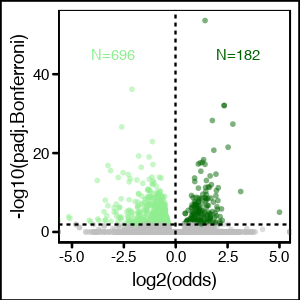

In [140]:
options(repr.plot.width = 2.5, repr.plot.height = 2.5)
pd <- pd.fig2_prom_ttest_res %>% filter(celltype == "beta") %>% mutate(ty = ifelse(padj.Bonferroni >= 
    0.01, 0, ifelse(odds < 1, 1, 2))) 
pd%>% ggplot(aes(log2(odds), -log10(padj.Bonferroni))) + 
    geom_point(aes(col = as.factor(ty)), size = 1, alpha = 0.5,shape=16) + coord_cartesian(expand = T) + 
    theme_base(base_size = 11, base_family = "Arial") + theme(axis.ticks.length = unit(1, 
    "mm")) + geom_hline(yintercept = 2, color = "black", linetype = 2) + geom_vline(xintercept = 0, 
    color = "black", linetype = 2) + theme(legend.position = "none") + scale_color_manual(values = c('0'="grey", 
    "2"="darkgreen","1"="lightgreen")) + annotate(geom = "text", x = -3, y = 45, label =paste0("N=",table(pd$ty)[["1"]]), 
    size = 3,color="lightgreen",family = "Arial")+annotate(geom = "text", x = 3, y = 45, label =paste0("N=",table(pd$ty)[["2"]]), 
    size = 3,color="darkgreen",family = "Arial")

ggsave(filename = "fig_2C.prom_beta_volcano.pdf",width = 2.5,height = 2.5,useDingbats=F)
# ggarrange(p3 %+% subset(pd.fig2_prom_ttest_res, celltype == 'alpha'), p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'beta'),ncol=2)

### 1.1.2 alpha

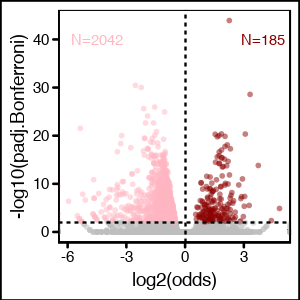

In [142]:
options(repr.plot.width = 2.5, repr.plot.height = 2.5)
pd <- pd.fig2_prom_ttest_res %>% filter(celltype == "alpha") %>% mutate(ty = ifelse(padj.Bonferroni >= 
    0.01, 0, ifelse(odds < 1, 1, 2))) 
pd%>% ggplot(aes(log2(odds), -log10(padj.Bonferroni))) + 
    geom_point(aes(col = as.factor(ty)), size = 1, alpha = 0.5,shape=16) + coord_cartesian(expand = T) + 
    theme_base(base_size = 11, base_family = "Arial") + theme(axis.ticks.length = unit(1, 
    "mm")) + geom_hline(yintercept = 2, color = "black", linetype = 2) + geom_vline(xintercept = 0, 
    color = "black", linetype = 2) + theme(legend.position = "none") + scale_color_manual(values = c('0'="grey", 
    "2"="darkred","1"="lightpink")) + annotate(geom = "text", x = -4.5, y = 40, label =paste0("N=",table(pd$ty)[["1"]]), 
    size = 3,color="lightpink",family = "Arial"))+annotate(geom = "text", x = 4, y = 40, label =paste0("N=",table(pd$ty)[["2"]]), 
    size = 3,color="darkred",family = "Arial")

ggsave(filename = "fig_2C.prom_alpha_volcano.pdf",width = 2.5,height = 2.5,useDingbats=F)
# ggarrange(p3 %+% subset(pd.fig2_prom_ttest_res, celltype == 'alpha'), p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'beta'),ncol=2)

### 1.1.3 alpha + beta: annotation

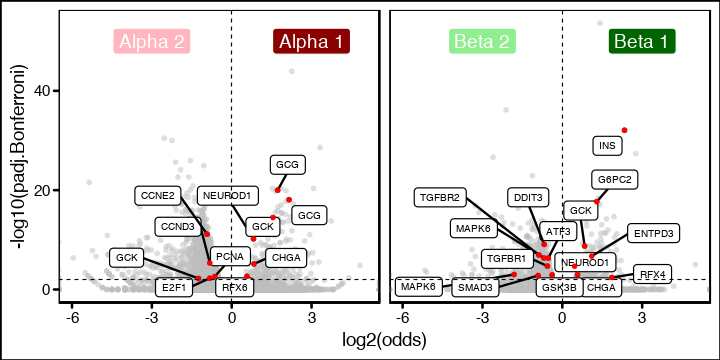

In [180]:
pd.fig2_prom_ttest_res <- fread('../dat/figdata/fig2_prom_ttest_res.csv')
feature.glist <- list(alpha = list(alpha1 = c("CHGA", "GCG", "GCK", "NEUROD1", "RFX6"), 
    alpha2 = c("PCNA", "CCND3", "CCNE2", "E2F1")), beta = list(beta2 = c("ATF3", 
    "DDIT3", "FOXO1.", "TGFBR1", "TGFBR2", "SMAD3", "GSK3B", "MAPK6"), beta1 = c("INS", 
    "CHGA", "G6PC2", "GCK", "RFX4", "NEUROD1", "ENTPD3")))

p.base <- pd.fig2_prom_ttest_res %>% ggplot(aes(log2(odds), -log10(padj.Bonferroni))) + 
    geom_point(size = 1, alpha = 0.5, shape = 16) + coord_cartesian(expand = T) + 
    theme_base(base_size = 11, base_family = "Arial") + theme(axis.ticks.length = unit(1, 
    "mm"))

options(repr.plot.width = 6, repr.plot.height = 3)

p.base + gghighlight(((Gene %in% unlist(feature.glist$alpha) & celltype == "alpha") | 
    (Gene %in% unlist(feature.glist$beta) & celltype == "beta")) & (padj.Bonferroni < 
    0.01), label_key = Gene, label_params = list(size = 2)) + geom_point(col = "red", 
    size = 0.5) + geom_hline(yintercept = 2, color = "black", linetype = 2, size = .25) + 
    geom_vline(xintercept = 0, color = "black", linetype = 2, size = .25) + facet_wrap(~celltype) + 
    theme(strip.background = element_blank(), strip.text.x = element_blank()) + geom_label(data = data.frame(odds = c(2^-3, 
    2^3, 2^-3, 2^3), padj.Bonferroni = 1e-50, labels = c("Alpha 2", "Alpha 1", "Beta 2", 
    "Beta 1"), celltype = c("alpha", "alpha", "beta", "beta")), aes(label = labels, 
    fill = labels), colour = "white") + scale_fill_manual(values = c(`Alpha 2` = "lightpink", 
    `Alpha 1` = "darkred", `Beta 2` = "lightgreen", `Beta 1` = "darkgreen"))

ggsave(filename = "fig_s.prom_volcano_anno_bio.pdf", width = 6, height = 3, useDingbats = F)


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


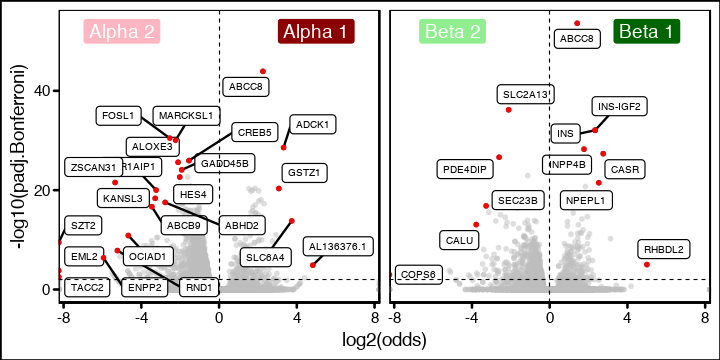

In [185]:
p.base + gghighlight(((-log10(padj.Bonferroni) - 4.5 * log2(odds) - 30 > 0) | (-log10(padj.Bonferroni) + 
    7.5 * log2(odds) - 40 > 0)) & padj.Bonferroni < 0.01, label_key = Gene, label_params = list(size = 2)) + 
    geom_point(col = "red", size = 0.5) + geom_hline(yintercept = 2, color = "black", 
    linetype = 2, size = 0.25) + geom_vline(xintercept = 0, color = "black", linetype = 2, 
    size = 0.25) + facet_wrap(~celltype) + theme(strip.background = element_blank(), 
    strip.text.x = element_blank()) + geom_label(data = data.frame(odds = c(2^-5, 
    2^5, 2^-5, 2^5), padj.Bonferroni = 1e-52, labels = c("Alpha 2", "Alpha 1", "Beta 2", 
    "Beta 1"), celltype = c("alpha", "alpha", "beta", "beta")), aes(label = labels, 
    fill = labels), colour = "white") + scale_fill_manual(values = c(`Alpha 2` = "lightpink", 
    `Alpha 1` = "darkred", `Beta 2` = "lightgreen", `Beta 1` = "darkgreen")) + coord_cartesian(xlim = c(-7.5, 
    7.5))

ggsave(filename = "fig_s.prom_volcano_anno_outliner.pdf", width = 6, height = 3, 
    useDingbats = F)

## 1.2 prom GOterm

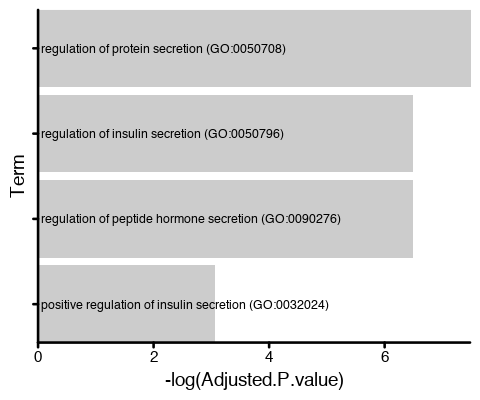

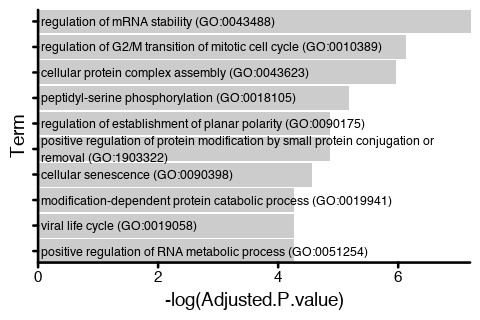

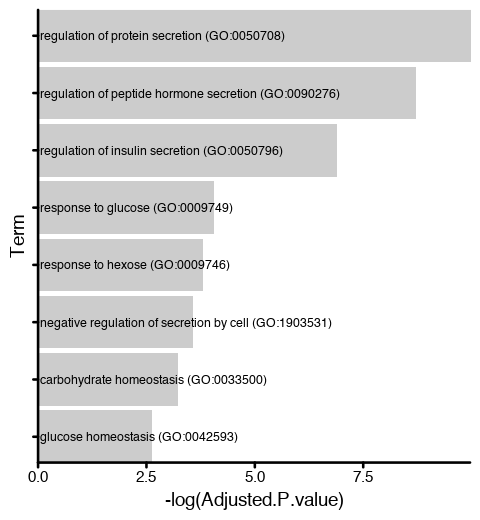

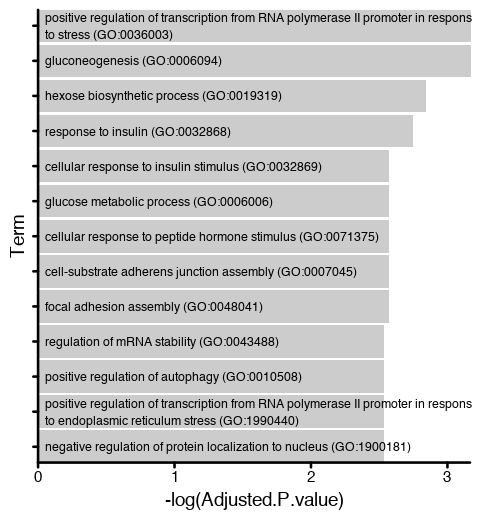

In [304]:
pd.go.res <- sapply(c("alpha1","alpha2","beta1","beta2"),function(ct){
    fn = paste0("../dat/1901/",ct,".EnrichR.BP.100less.csv")
    fread(fn)
},simplify=F,USE.NAMES=T)

for (ct in c("alpha1", "alpha2", "beta1", "beta2")) {
    pd <- pd.go.res[[ct]] %>% filter(Adjusted.P.value <= 0.1) %>% arrange(desc(Adjusted.P.value)) %>% 
        top_n(-10, Adjusted.P.value)
    
    l <- nrow(pd)
    d <- 80
    options(repr.plot.width = 4, repr.plot.height = l/3)
    p <- ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, d), levels = (stringr::str_wrap(Term, 
        d)))), aes(Term, -log(Adjusted.P.value))) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = F) + theme_pubr() + theme(axis.text.y = element_blank(), 
        panel.border = element_rect(colour = NA), axis.line = element_line(colour = "black")) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
    print(p)
    ggsave(filename =paste0("fig_s.prom_",ct,"_GOBP.pdf"), width = 4, height = l/3, 
    useDingbats = F)
}


if (F) {
    pd <- pd.go.res$alpha2 %>% filter(Adjusted.P.value <= 0.1) %>% arrange(Combined.Score) %>% 
        top_n(10, Combined.Score)
    l <- nrow(pd)
    ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, 60), levels = (stringr::str_wrap(Term, 
        60)))), aes(Term, Combined.Score)) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = T) + theme_pubr() + theme(axis.text.y = element_blank()) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
}

## 1.3 prom GSEA 

## 1.4 prom pseudostate heatmap

pdf 
  2

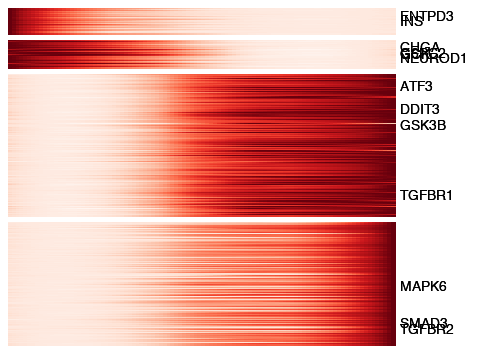

In [384]:
#saveRDS(object = list(pd.hm = dat.sub.2.scale[names(final.ord)[order(final.ord)], ], pd.ord = final.ord, 
#    pd.enrichr.res = pk.list.gene.enrichr),file='../dat/figdata/fig2_prom_alpha_ps.Rds')
pd.fig2_prom_beta_ps<- readRDS('../dat/figdata/fig2_prom_beta_ps2.Rds')

options(repr.plot.width=4, repr.plot.height=3)
row_labels<-(pd.fig2_prom_beta_ps$pd.ord %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    separate(gene_tr.idx, into = c("gene", "tr.idx"), remove = F, sep = "_") %>% 
    mutate(labels = ifelse(gene %in% feature.glist$beta$beta1 & `.` %in% 1:2, gene, ifelse(gene %in% 
        feature.glist$beta$beta2 & `.` %in% 3:4, gene, ""))))$labels

p<-pheatmap(pd.fig2_prom_beta_ps$pd.hm,color = colorRampPalette(brewer.pal(n = 9,name = "Reds"))(100),
         gaps_row = as.numeric(cumsum(table(pd.fig2_prom_beta_ps$pd.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         labels_row=(row_labels),fontsize=8,border_color=NA,
         show_rownames = T,show_colnames = F,legend=F)
print(p)
pdf("fig_2B.prom_ps_heatmap_beta2.pdf",height = 3,width = 4,family = "Arial")
print(p)
dev.off()

pdf 
  2

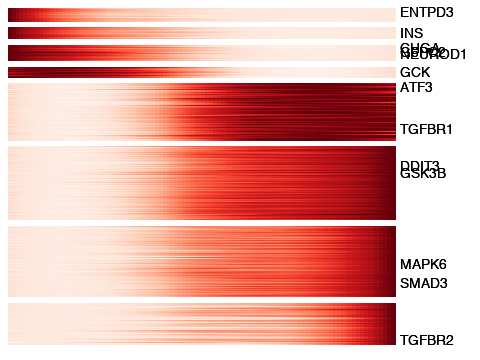

In [385]:
#saveRDS(object = list(pd.hm = dat.sub.2.scale[names(final.ord)[order(final.ord)], ], pd.ord = final.ord, 
#    pd.enrichr.res = pk.list.gene.enrichr),file='../dat/figdata/fig2_prom_alpha_ps.Rds')
pd.fig2_prom_beta_ps<- readRDS('../dat/figdata/fig2_prom_beta_ps.Rds')

options(repr.plot.width=4, repr.plot.height=3)
row_labels<-(pd.fig2_prom_beta_ps$pd.ord %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    separate(gene_tr.idx, into = c("gene", "tr.idx"), remove = F, sep = "_") %>% 
    mutate(labels = ifelse(gene %in% feature.glist$beta$beta1 & `.` %in% 1:4, gene, ifelse(gene %in% 
        feature.glist$beta$beta2 & `.` %in% 5:8, gene, ""))))$labels

p<-pheatmap(pd.fig2_prom_beta_ps$pd.hm,color = colorRampPalette(brewer.pal(n = 9,name = "Reds"))(100),
         gaps_row = as.numeric(cumsum(table(pd.fig2_prom_beta_ps$pd.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         labels_row=(row_labels),fontsize=8,border_color=NA,
         show_rownames = T,show_colnames = F,legend=F)
print(p)
pdf("fig_2B.prom_ps_heatmap_beta.pdf",height = 3,width = 4,family = "Arial")
print(p)
dev.off()

pdf 
  2

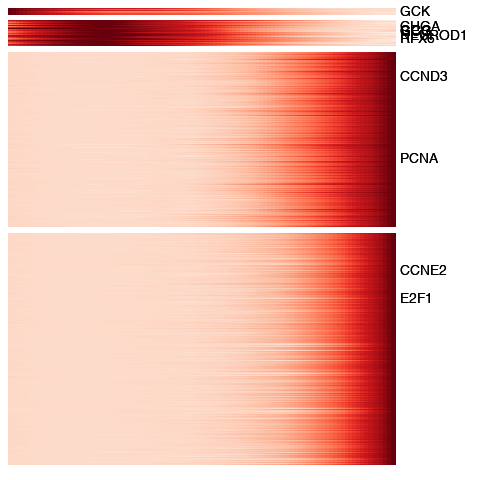

In [386]:
#saveRDS(object = list(pd.hm = dat.sub.2.scale[names(final.ord)[order(final.ord)], ], pd.ord = final.ord, 
#    pd.enrichr.res = pk.list.gene.enrichr),file='../dat/figdata/fig2_prom_alpha_ps.Rds')
pd.fig2_prom_alpha_ps<- readRDS('../dat/figdata/fig2_prom_alpha_ps.Rds')

options(repr.plot.width=4, repr.plot.height=4)
row_labels<-(pd.fig2_prom_alpha_ps$pd.ord %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    separate(gene_tr.idx, into = c("gene", "tr.idx"), remove = F, sep = "_") %>% 
    mutate(labels = ifelse(gene %in% feature.glist$alpha$alpha1 & `.` %in% 1:2, gene, ifelse(gene %in% 
        feature.glist$alpha$alpha2 & `.` %in% 3:4, gene, ""))))$labels

p<-pheatmap(pd.fig2_prom_alpha_ps$pd.hm,color = colorRampPalette(brewer.pal(n = 9,name = "Reds"))(100),
         gaps_row = as.numeric(cumsum(table(pd.fig2_prom_alpha_ps$pd.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         labels_row=(row_labels),fontsize=8,border_color=NA,
         show_rownames = T,show_colnames = F,legend=F)
print(p)
pdf("fig_2B.prom_ps_heatmap_alpha.pdf",height = 4,width = 4,family = "Arial")
print(p)
dev.off()

In [390]:

for (i in 1:4) {
    pd <- pd.fig2_prom_beta_ps$pd.enrichr.res[[i]] %>%separate(Overlap, into = c("n.hit","n.all"),sep = '/',convert =T)%>%
        filter(n.all<=150& Adjusted.P.value<0.1) %>% arrange(desc(Adjusted.P.value)) %>% 
        top_n(-10, Adjusted.P.value)
    
    l <- nrow(pd)
    d <- 80
    options(repr.plot.width = 4, repr.plot.height = l/3)
    p <- ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, d), levels = (stringr::str_wrap(Term, 
        d)))), aes(Term, -log(Adjusted.P.value))) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = F) + theme_pubr() + theme(axis.text.y = element_blank(), 
        panel.border = element_rect(colour = NA), axis.line = element_line(colour = "black")) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
    #print(p)
    ggsave(p,filename =paste0("fig_s.prom_beta_c",i,"_GOBP.pdf"), width = 4, height = l/3, 
    useDingbats = F)
}


In [391]:
for (i in 1:4) {
    pd <- pd.fig2_prom_alpha_ps$pd.enrichr.res[[i]] %>%separate(Overlap, into = c("n.hit","n.all"),sep = '/',convert =T)%>%
        filter(n.all<=150& Adjusted.P.value<0.1) %>% arrange(desc(Adjusted.P.value)) %>% 
        top_n(-10, Adjusted.P.value)
    
    l <- nrow(pd)
    d <- 80
    options(repr.plot.width = 4, repr.plot.height = l/3)
    p <- ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, d), levels = (stringr::str_wrap(Term, 
        d)))), aes(Term, -log(Adjusted.P.value))) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = F) + theme_pubr() + theme(axis.text.y = element_blank(), 
        panel.border = element_rect(colour = NA), axis.line = element_line(colour = "black")) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
    #print(p)
    ggsave(p,filename =paste0("fig_s.prom_alpha_c",i,"_GOBP.pdf"), width = 4, height = l/3, 
    useDingbats = F)
}